In [1]:
import numpy as np
import esig
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
from functions import *

In [2]:
# Load data
H1 = pd.read_csv('data/H1-STRAIN-1126259461-1.csv', header=0)
L1 = pd.read_csv('data/L1-STRAIN-1126259461-1.csv', header=0)
Y = np.array([H1.Strain[1700:2300], L1.Strain[1700:2300]]).T

# Settings

In [3]:
# The delay embedding size
emb = 16

# Signature depth
depth = 3

# Regularisation term
lamb = 1e-3 # 1e-3, 1e-6, 1e-9

# Algorithm iterations
iterations = 15

# Ratio of measurement error vs model error
rho = 0.1

In [4]:
# Initialise
Yhat = Y
Yhat_orig = Y

# Algorithm to denoise and model the time series

In [5]:
for i in range(0, iterations):
    Xhat = sig_embedding(emb, depth, Yhat)
    Ax, C = estimateAC(emb, Xhat, Yhat, lamb)
    _, Yhat = filterfunction(Ax, C, Yhat_orig, rho, lamb)

# Plot the denoised trajectory

Text(0.5, 0, 'time steps')

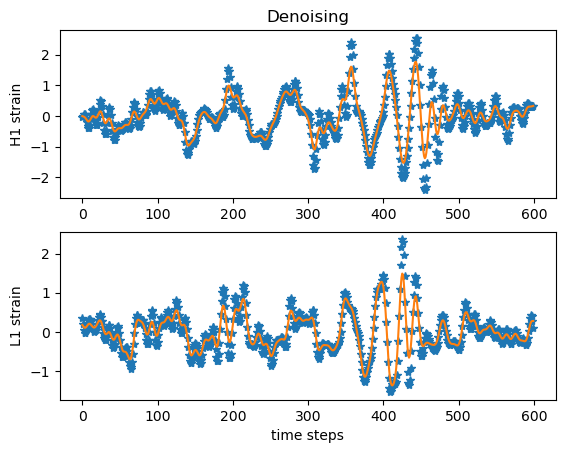

In [12]:
# Plot the denoised trajecory Yhat
plt.subplot(2, 1, 1)
plt.plot(Y[0:,0], '*')
plt.plot(Yhat[0:,0])
plt.ylabel('H1 strain')
plt.title('Denoising')
plt.subplot(2, 1, 2)
plt.plot(Y[0:,1], '*')
plt.plot(Yhat[0:,1])
plt.ylabel('L1 strain')
plt.xlabel('time steps')

# Model predictions

In [7]:
# Prediction error: next state space x(t+1) = Ax x(t)
Xpred_tplus1 = np.matmul(Xhat, Ax.T)

# Prediction error: next state space y(t) = C x(t)
Ypred_tplus1 = np.matmul(Xpred_tplus1, C.T)

Text(0.5, 0, 'time steps')

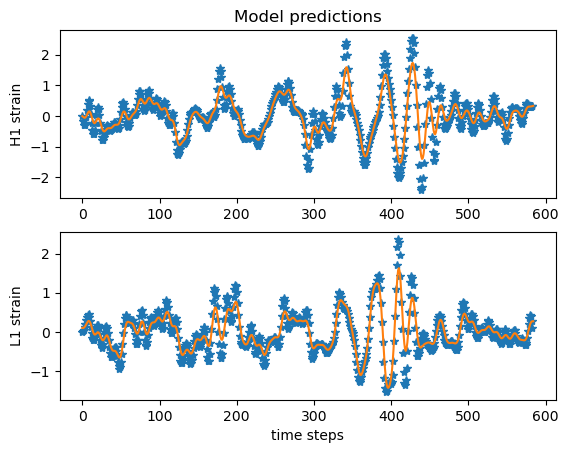

In [11]:
# Plot the denoised trajecory Yhat as calculated by the state prediction
plt.subplot(2, 1, 1)
plt.plot(Y[emb:,0], "*")
plt.plot(Ypred_tplus1[:,0])
plt.ylabel('H1 strain')
plt.title('Model predictions')
plt.subplot(2, 1, 2)
plt.plot(Y[emb:,1], "*")
plt.plot(Ypred_tplus1[:,1])
plt.ylabel('L1 strain')
plt.xlabel('time steps')